In [173]:
import numpy as np
import scipy as sp
import scipy.ndimage as ndi
import pylab as pl
from os import listdir
from os.path import isfile, join
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [174]:
mypath = os.getcwd()+'\\input_img'
inputs = [f for f in listdir(mypath) if isfile(join(mypath, f))]


In [175]:
im1 = ndi.imread(join(mypath, inputs[0]))
im2 = np.dstack([im1[:,:,i].astype(float)/255 for i in range(3)])

fname = inputs[0]
fname[:-4]

'crop_1131112151125160_N1_C3_Q0011'

## color balance

[ 1.02357091  1.03344576  0.82398553]
[ 0.99537375  1.17971959  1.01298917]
[ 1.01954651  1.00780973  1.01643855]
[ 1.0105355   0.86192225  0.98271295]
[ 1.00200466  1.02633331  0.92367885]


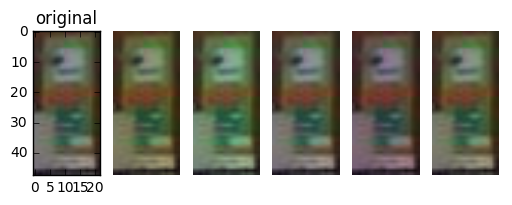

In [200]:
fig = plt.figure()
ax = fig.add_subplot(161)
pl.imshow(im2)
pl.title('original')
cb_mean = 1
cb_std = 0.1
for i in range(5):
    multiplier = np.random.normal(cb_mean, cb_std, 3)
    im3 = (im2 * multiplier).clip(0,1)
    ax = fig.add_subplot(160+i+2)
    pl.imshow(im3)
    pl.axis('off')
    sp.misc.imsave('./tmp/'+ fname[:-4] + '-cb' +str(i)+'.png',im3)
    print multiplier

## gamma correction (contrast)

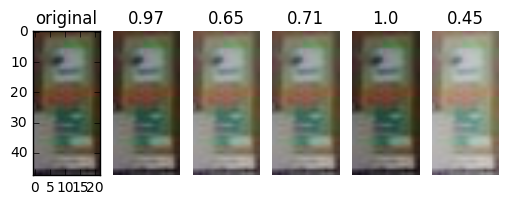

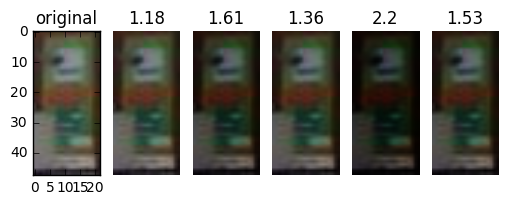

In [234]:
fname = inputs[0]
threshold = 0.4
lcMultipliers = np.random.uniform(threshold, 1, 5)
hcMultipliers = np.random.uniform(1, 1/threshold, 5)

# low contrast
fig = plt.figure()
ax = fig.add_subplot(161)
pl.imshow(im1)
pl.title('original')
for i in range(5):
    multiplier = lcMultipliers[i]
    imgsq = im1.astype(float)**multiplier
    imgsq *= 255 / imgsq.max()
    imlc = imgsq.astype(np.uint8)
    ax = fig.add_subplot(160+i+2)
    pl.imshow(imlc)
    pl.axis('off')
    pl.title(str(round(multiplier,2)))
    sp.misc.imsave('./tmp/'+ fname[:-4] + '-lc' +str(i)+'.png',imlc)

# hi contrast
fig = plt.figure()
ax = fig.add_subplot(161)
pl.imshow(im1)
pl.title('original')
for i in range(5):
    multiplier = hcMultipliers[i]
    imgsq = im1.astype(float)**multiplier
    imgsq *= 255 / imgsq.max()
    imhc = imgsq.astype(np.uint8)
    ax = fig.add_subplot(160+i+2)
    pl.imshow(imhc)
    pl.axis('off')
    pl.title(str(round(multiplier,2)))
    sp.misc.imsave('./tmp/'+ fname[:-4] + '-hc' +str(i)+'.png',imhc)

## resolution 

[ 3.0610033  -0.67481129  0.82197822  4.27101116  1.66078189]


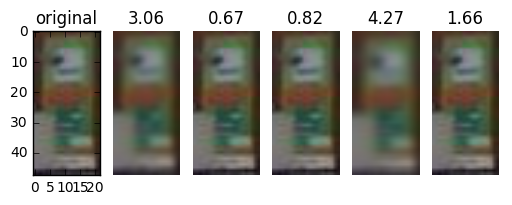

In [206]:
#minsize = min(im1.shape[:2])
#minsize=100
#resMultipliers = np.random.uniform(1,minsize*5.0/100,5)
resMultipliers = np.random.normal(0,2,5)

fig = plt.figure()
ax = fig.add_subplot(161)
pl.imshow(im1)
pl.title('original')
for i in range(5):
    multiplier = np.absolute(resMultipliers[i])
    imglr = ndi.filters.uniform_filter(im1, [multiplier,multiplier,0])
    ax = fig.add_subplot(162+i)
    pl.imshow(imglr)
    pl.axis('off')
    pl.title(str(round(multiplier,2)))
    sp.misc.imsave('./tmp/'+ fname[:-4] + '-res' +str(i)+'.png',imglr)
print resMultipliers

## focus

[ 1.22894948 -3.88548399  2.76765902 -1.25839796 -0.8835312 ]


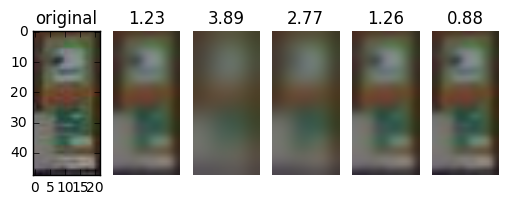

In [232]:
minsize = min(im1.shape[:2])/2
#focMultipliers = np.random.uniform(1,minsize*5.0/100,5)
#focMultipliers = np.random.uniform(0,1,5)
focMultipliers = np.random.normal(0,2,5)

fig = plt.figure()
ax = fig.add_subplot(161)
pl.imshow(im1)
pl.title('original')
for i in range(5):
    multiplier = np.absolute(focMultipliers[i])
    imglr = ndi.filters.gaussian_filter(im1, [multiplier,multiplier,0])
    ax = fig.add_subplot(162+i)
    pl.imshow(imglr)
    pl.axis('off')
    pl.title(str(round(multiplier,2)))
    sp.misc.imsave('./tmp/'+ fname[:-4] + '-foc' +str(i)+'.png',imglr)

print focMultipliers

In [228]:
5./100 * 18

0.9

In [136]:
np.random.normal(0,2,5)

array([-3.10942014,  1.02536352, -1.43856733, -0.02281923,  0.38424815])

In [143]:
np.random.normal(1,0.1,5)

array([ 0.92296178,  0.88510015,  1.04986113,  1.0191515 ,  1.14194251])

In [171]:
'''
image manipulation
'''

import numpy as np
import scipy as sp
import scipy.ndimage as ndi
import pylab as pl
from os import listdir
from os.path import isfile, join


'''
public vars
'''
n_copy = 5
path = os.getcwd()+'\\input_img' #input_img is a folder containing cropped images
# color balance
cb_mean = 1
cb_std = 0.1
# gamma correction
contrast_threshold = 0.4
low_contrast_multipliers = np.random.uniform(contrast_threshold,1,n_copy)
high_contrast_multipliers = np.random.uniform(1,1/contrast_threshold,n_copy)
# resolution
resolution_multipliers = np.random.normal(0,2,n_copy)
# focus
focus_multipliers = np.random.normal(0,2,n_copy)


def main():
    inputs = [f for f in listdir(path) if isfile(join(path, f))]
    for i in range(len(inputs)):
        img = Im(inputs[i])
        img.generate_color_balance()
        img.generate_contrast()
        img.generate_resolution()
        img.generate_focus()


class Im(object):
    '''
    class image
    '''
    def __init__(self, filename):
        self.image = ndi.imread(join(path, filename))
        self.name = filename[:-4]

    def generate_color_balance(self):
        self.im2 = np.dstack([self.image[:,:,j].astype(float)/255 for j in range(3)])
        for n in range(n_copy):
            self.cb_multiplier = np.random.normal(cb_mean, cb_std, 3)
            self.imcb = (self.im2 * self.cb_multiplier).clip(0,1)
            sp.misc.imsave('./tmp/'+ self.name + '-cb-' +str(n)+'.png', self.imcb)
    
    def generate_contrast(self):
        self.contrast_multipliers = np.hstack([low_contrast_multipliers,high_contrast_multipliers])
        for n in range(len(self.contrast_multipliers)):
            self.con_multiplier = self.contrast_multipliers[n]
            self.imgsq = self.image.astype(float)**self.con_multiplier
            self.imgsq *= 255 / self.imgsq.max()
            self.imlc = self.imgsq.astype(np.uint8)
            sp.misc.imsave('./tmp/'+ self.name + '-con-' +str(n)+'.png', self.imlc)

    def generate_resolution(self):
        for n in range(n_copy):
            self.res_multiplier = np.absolute(resolution_multipliers[n])
            self.imlr = ndi.filters.uniform_filter(self.image, [self.res_multiplier,self.res_multiplier,0])
            sp.misc.imsave('./tmp/'+ self.name + '-res-' +str(n)+'.png', self.imlr)
    
    def generate_focus(self):
        for n in range(n_copy):
            self.foc_multiplier = np.absolute(focus_multipliers[n])
            self.imlf = ndi.filters.gaussian_filter(self.image, [self.foc_multiplier,self.foc_multiplier,0])
            sp.misc.imsave('./tmp/'+ self.name + '-foc-' +str(n)+'.png', self.imlf)


if __name__ == '__main__':
    main()


In [166]:
len(np.hstack([low_contrast_multipliers,high_contrast_multipliers]))

10

In [170]:
900/36

25